# **Processamento de linguagem natural com Python**

# Importação das bibliotecas

In [1]:
!pip install -q spacy==2.2.3 #Atualizado: 02/05/2021 Obs: utilizar esta versão.

     |████████████████████████████████| 10.4 MB 4.4 MB/s 
     |████████████████████████████████| 184 kB 36.2 MB/s 
     |████████████████████████████████| 3.7 MB 37.2 MB/s 
     |████████████████████████████████| 2.2 MB 8.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.3.0 requires spacy<3.4.0,>=3.3.0.dev0, but you have spacy 2.2.3 which is incompatible.


In [2]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [3]:
!python3 -m spacy download pt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.2 MB 51.3 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186281 sha256=13fab5b93c86037e2d36833932bb5427e8ea9abcb6df225026bb9247d6e72c6c
  Stored in directory: /tmp/pip-ephem-wheel-cache-6l20y85b/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


# Marcação POS

- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
- Lista de tokens: https://spacy.io/api/annotation#pos-tagging
- Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [4]:
pln = spacy.load('pt')
pln

In [5]:
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Curitiba')

In [6]:
type(documento)

spacy.tokens.doc.Doc

In [7]:
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Curitiba PROPN


# Lematização e stemização

In [8]:
for token in documento:
  print(token.text, token.lemma_)

Estou Estou
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso cursar
em em
Curitiba Curitiba


In [9]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'cursar',
 'cursar']

In [10]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [11]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [12]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou Estou est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
curso cursar curs
em em em
Curitiba Curitiba curitib


# Carregamento dos textos

In [13]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [14]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"be5264f8-21fb-4958-9974-d07f1bfae812","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":63711508,"wgRevisionId":63711508,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!P\xc3\xa1ginas com erros e

In [15]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"be5264f8-21fb-4958-9974-d07f1bfae812","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Inteligência_artificial","wgTitle":"Inteligência artificial","wgCurRevisionId":63711508,"wgRevisionId":63711508,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Páginas com erros em referências","!CS1 inglês-fontes em língua (en)","!CS1 manut: Nomes múltip

In [16]:
paragrafos = dados_html.find_all('p')

In [17]:
len(paragrafos)

114

In [21]:
paragrafos[1]

<p class="vector-menu-heading " id="p-navigation-label">
<span class="vector-menu-heading-label">Navegação</span>
</p>

In [22]:
paragrafos[1].text

'\nNavegação\n'

In [23]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [24]:
conteudo

'\n\t\tPáginas para editores conectados saiba mais\n\nNavegação\n\nColaboração\n\nFerramentas\n\nImprimir/exportar\n\nNoutros projetos\nConteúdoNa tecnologia, a Inteligência Artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes[1], além de também ser um campo de estudo acadêmico.[2] Onde o principal objetivo é de executar funções de modo autônomo que, caso um ser humano fosse executar, seriam consideradas inteligentes. \nÉ um conceito amplo, e que recebe tantas definições quanto damos significados diferentes à palavra inteligência.[3] Podemos pensar em algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos de forma que no futuro agirá de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e s

In [25]:
# colocando tudo em letra minuscolua
conteudo = conteudo.lower()
conteudo

'\n\t\tpáginas para editores conectados saiba mais\n\nnavegação\n\ncolaboração\n\nferramentas\n\nimprimir/exportar\n\nnoutros projetos\nconteúdona tecnologia, a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes[1], além de também ser um campo de estudo acadêmico.[2] onde o principal objetivo é de executar funções de modo autônomo que, caso um ser humano fosse executar, seriam consideradas inteligentes. \né um conceito amplo, e que recebe tantas definições quanto damos significados diferentes à palavra inteligência.[3] podemos pensar em algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos de forma que no futuro agirá de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e s

# Buscas em textos com spaCy

In [26]:
pln = spacy.load('pt')
pln

In [27]:
string = 'turing'
token_pesquisa = pln(string)

In [28]:
pln.vocab

In [29]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [30]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3138, 3139),
 (8661325627334373315, 3148, 3149),
 (8661325627334373315, 3304, 3305),
 (8661325627334373315, 3309, 3310),
 (8661325627334373315, 3315, 3316),
 (8661325627334373315, 3378, 3379),
 (8661325627334373315, 4010, 4011),
 (8661325627334373315, 5285, 5286),
 (8661325627334373315, 8754, 8755),
 (8661325627334373315, 8890, 8891),
 (8661325627334373315, 8986, 8987),
 (8661325627334373315, 9103, 9104)]

In [35]:
doc[3138:3139], doc[3138-5:3139+5]

(turing, uma contribuição prática de alan turing foi o que se chamou)

In [36]:
doc[3148:3149], doc[3148-5:3149+5]

(turing, chamou depois de teste de turing (tt),[25] de 1950)

In [37]:
matches[0], matches[0][1], matches[0][2]

((8661325627334373315, 3138, 3139), 3138, 3139)

In [38]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"
display(HTML(f"""... {texto} ... """))

# Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [45]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

inteligentes[1 ORG
cotidiano).[3 ORG
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
circulares.[9 MISC
tecnologia.[10 MISC
internet.[10 MISC
google ORG
wikipedia MISC
john mccarthy PER
racionalmente".[11][12 ORG
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
problem solver PER
gps PER
newell PER
gps ORG
brasil LOC
associação brasileira de inteligência artificial ORG
allen newell PER
herbert simon PER
universidade carnegie mellon ORG
marvin minsky PER
mit ai lab MISC
conferência de verão de 1956 MISC
darthmouth LOC
advanced research projects agency” ORG
estados unidos LOC
generation project” MISC
japão LOC
andreas kaplan PER
michael haenlein PER
john mccarthy PER
gubern PER
román LOC
inteligente[17 MISC
john haugeland PER
good old-fashioned artificial intelligence MISC
não-gofai.[20][21 ORG
w. grey walter PER
jo

In [46]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

# Nuvem de palavras e stop words

In [39]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'fui', 'mesmo', 'até', 'essa', 'estivestes', 'alguns', 'seis', 'podem', 'direita', 'porém', 'aqui', 'estar', 'estivemos', 'sim', 'meio', 'nível', 'sexta', 'ali', 'nove', 'quanto', 'novo', 'desta', 'algo', 'és', 'apenas', 'oitavo', 'sabe', 'somos', 'coisa', 'ou', 'tua', 'possível', 'pois', 'quem', 'porquê', 'contra', 'sempre', 'nossa', 'naquele', 'para', 'estiveste', 'segunda', 'nada', 'embora', 'estou', 'tempo', 'nos', 'daquele', 'disso', 'nova', 'vosso', 'todo', 'foi', 'fez', 'como', 'pode', 'puderam', 'questão', 'diz', 'obrigado', 'tive', 'usar', 'sei', 'dizer', 'se', 'quê', 'ver', 'dar', 'nosso', 'oito', 'estado', 'tão', 'breve', 'esta', 'não', 'possivelmente', 'querem', 'primeira', 'isso', 'tuas', 'parece', 'dezanove', 'veja', 'vos', 'tarde', 'tais', 'bem', 'dezasseis', 'terceiro', 'antes', 'favor', 'grupo', 'acerca', 'por', 'segundo', 'uns', 'adeus', 'foste', 'vossa', 'um', 'onde', 'dizem', 'era', 'aquelas', 'mil', 'quieto', 'meses', 'ambas', 'dois', 'sem', 'você', 'ao', 'obrigad

In [40]:
len(STOP_WORDS)

413

In [41]:
pln.vocab['usa'].is_stop

True

In [42]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [43]:
print(lista_token)

['\n\t\t', 'páginas', 'para', 'editores', 'conectados', 'saiba', 'mais', '\n\n', 'navegação', '\n\n', 'colaboração', '\n\n', 'ferramentas', '\n\n', 'imprimir', '/', 'exportar', '\n\n', 'n', 'outros', 'projetos', '\n', 'conteúdona', 'tecnologia', ',', 'a', 'inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'a', 'inteligência', 'demonstrada', 'por', 'máquinas', 'a', 'o', 'executar', 'tarefas', 'complexas', 'associadas', 'a', 'seres', 'inteligentes[1', ']', ',', 'além', 'de', 'também', 'ser', 'um', 'campo', 'de', 'estudo', 'acadêmico.[2', ']', 'onde', 'o', 'principal', 'objetivo', 'é', 'de', 'executar', 'funções', 'de', 'modo', 'autônomo', 'que', ',', 'caso', 'um', 'ser', 'humano', 'fosse', 'executar', ',', 'seriam', 'consideradas', 'inteligentes', '.', '\n', 'é', 'um', 'conceito', 'amplo', ',', 'e', 'que', 'recebe', 'tantas', 'definições', 'quanto', 'damos', 'significados', 'diferen

In [44]:
len(lista_token)

10033

In [47]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [48]:
print(sem_stop)

['\n\t\t', 'páginas', 'editores', 'conectados', 'saiba', '\n\n', 'navegação', '\n\n', 'colaboração', '\n\n', 'ferramentas', '\n\n', 'imprimir', '/', 'exportar', '\n\n', 'n', 'projetos', '\n', 'conteúdona', 'tecnologia', ',', 'a', 'inteligência', 'artificial', '(', 'sigla', ':', 'ia', ';', 'inglês', ':', 'artificial', 'intelligence', ',', 'sigla', ':', 'ai', ')', 'a', 'inteligência', 'demonstrada', 'máquinas', 'a', 'o', 'executar', 'tarefas', 'complexas', 'associadas', 'a', 'seres', 'inteligentes[1', ']', ',', 'campo', 'estudo', 'acadêmico.[2', ']', 'o', 'principal', 'objetivo', 'executar', 'funções', 'modo', 'autônomo', ',', 'caso', 'humano', 'fosse', 'executar', ',', 'seriam', 'consideradas', 'inteligentes', '.', '\n', 'conceito', 'amplo', ',', 'e', 'recebe', 'tantas', 'definições', 'damos', 'significados', 'diferentes', 'palavra', 'inteligência.[3', ']', 'podemos', 'pensar', 'características', 'básicas', 'd', 'sistemas', ',', 'a', 'capacidade', 'raciocínio', '(', 'aplicar', 'regras',

In [49]:
len(sem_stop)

6672

In [50]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [51]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap=color_map)

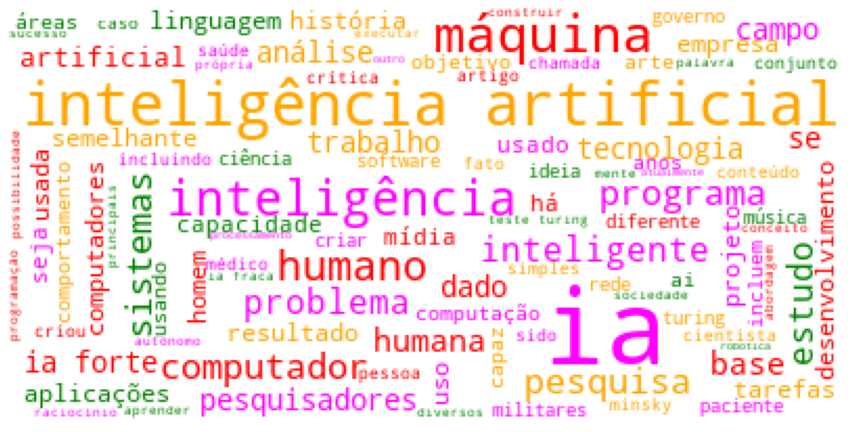

In [52]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()